# Credit Card Fraud Neural Network Model
Neural networks are capable of learning complex patterns and relationships in data. 
Credit card fraud detection requires identifying subtle and non-linear patterns 
in transaction data that might indicate fraudulent behavior. 
Neural networks excel at capturing such intricate patterns, making them well-suited for this task.

## High Accuracy 
When properly trained and optimized, neural network models can achieve high accuracy in detecting fraudulent transactions. 
They can significantly reduce false positives and false negatives, thus improving the overall performance of fraud detection systems.
Real time detection can also be acchieved through all of this with further advancements in the model.
In turn the model can keep learning and adapt to newer fraud patterns.

In [1]:
# import libraries and dependecies
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from pathlib import Path
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, Sequential
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.manifold import TSNE

In [2]:
# read in csv files and place into dataframes
credit_card_df = pd.read_csv("model_data/User0_credit_card_transactions.csv")
credit_card_users_df = pd.read_csv("model_data/sd254_users.csv")
credit_card_type_df = pd.read_csv("model_data/sd254_cards.csv")
display(credit_card_users_df.head(), credit_card_type_df.head())
credit_card_df.head()

,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
1,Sasha Sadr,53,68,1966,12,Female,3606 Federal Boulevard,NaN,Little Neck,NY,11363,40.76,-73.74,$37891,$77254,$191349,701,5
2,Saanvi Lee,81,67,1938,11,Female,766 Third Drive,NaN,West Covina,CA,91792,34.02,-117.89,$22681,$33483,$196,698,5
3,Everlee Clark,63,63,1957,1,Female,3 Madison Street,NaN,New York,NY,10069,40.71,-73.99,$163145,$249925,$202328,722,4
4,Kyle Peterson,43,70,1976,9,Male,9620 Valley Stream Drive,NaN,San Francisco,CA,94117,37.76,-122.44,$53797,$109687,$183855,675,1


,User,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web
0,0,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,0,1,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,0,2,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,0,3,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,0,4,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No


In [3]:
credit_card_df.dtypes

User                int64
Card                int64
Year                int64
Month               int64
Day                 int64
Time               object
Amount             object
Use Chip           object
Merchant Name       int64
Merchant City      object
Merchant State     object
Zip               float64
MCC                 int64
Errors?            object
Is Fraud?          object
dtype: object

In [4]:
credit_card_users_df.dtypes

Person                          object
Current Age                      int64
Retirement Age                   int64
Birth Year                       int64
Birth Month                      int64
Gender                          object
Address                         object
Apartment                      float64
City                            object
State                           object
Zipcode                          int64
Latitude                       float64
Longitude                      float64
Per Capita Income - Zipcode     object
Yearly Income - Person          object
Total Debt                      object
FICO Score                       int64
Num Credit Cards                 int64
dtype: object

In [5]:
credit_card_type_df.dtypes

User                      int64
CARD INDEX                int64
Card Brand               object
Card Type                object
Card Number               int64
Expires                  object
CVV                       int64
Has Chip                 object
Cards Issued              int64
Credit Limit             object
Acct Open Date           object
Year PIN last Changed     int64
Card on Dark Web         object
dtype: object

In [7]:
print(credit_card_df.isnull().sum())

credit_card_df['Amount'] = credit_card_df['Amount'].replace({'\$': '', ',': ''}, regex=True).astype(float)

User                  0
Card                  0
Year                  0
Month                 0
Day                   0
Time                  0
Amount                0
Use Chip              0
Merchant Name         0
Merchant City         0
Merchant State     1317
Zip                1647
MCC                   0
Errors?           19389
Is Fraud?             0
dtype: int64


In [8]:
label_encoder = LabelEncoder()
credit_card_df['Use Chip'] = label_encoder.fit_transform(credit_card_df['Use Chip'])
credit_card_df['Errors?'] = label_encoder.fit_transform(credit_card_df['Errors?'])
credit_card_df['Is Fraud?'] = label_encoder.fit_transform(credit_card_df['Is Fraud?'])

In [9]:
scaler = StandardScaler()
columns_to_scale = ['Year', 'Month', 'Day', 'Amount', 'Zip', 'MCC']
credit_card_df[columns_to_scale] = scaler.fit_transform(credit_card_df[columns_to_scale])

In [10]:
categorical_variables = list(credit_card_df.dtypes[credit_card_df.dtypes=="object"].index)

categorical_variables

['Time', 'Merchant City', 'Merchant State']

In [11]:
enc = OneHotEncoder(sparse = False)

In [12]:
encoded_data = enc.fit_transform(credit_card_df[categorical_variables])

In [13]:
encoded_credit_card_df = pd.DataFrame(encoded_data, columns=enc.get_feature_names_out(categorical_variables))

encoded_credit_card_df

,Time_00:01,Time_00:03,Time_00:06,Time_00:07,Time_00:08,Time_00:09,Time_00:10,Time_00:11,Time_00:12,Time_00:14,...,Merchant State_Philippines,Merchant State_Portugal,Merchant State_SC,Merchant State_Switzerland,Merchant State_TX,Merchant State_UT,Merchant State_VA,Merchant State_WA,Merchant State_WI,Merchant State_nan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
encoded_credit_card_df = pd.concat([credit_card_df[["Amount", "Use Chip", "Is Fraud?", "Errors?"]], encoded_credit_card_df], axis = 1)

encoded_credit_card_df

,Amount,Use Chip,Is Fraud?,Errors?,Time_00:01,Time_00:03,Time_00:06,Time_00:07,Time_00:08,Time_00:09,...,Merchant State_Philippines,Merchant State_Portugal,Merchant State_SC,Merchant State_Switzerland,Merchant State_TX,Merchant State_UT,Merchant State_VA,Merchant State_WA,Merchant State_WI,Merchant State_nan
0,0.560661,2,0,8,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.454774,2,0,8,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.414628,2,0,8,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.506071,2,0,8,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.248628,2,0,8,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19958,-0.760328,2,0,7,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19959,-0.566715,2,0,8,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19960,-0.715084,2,0,8,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19961,-0.711898,2,0,8,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
y = encoded_credit_card_df["Is Fraud?"]

type(y)

pandas.core.series.Series

In [16]:
X = encoded_credit_card_df.drop(columns=["Is Fraud?"])

X

,Amount,Use Chip,Errors?,Time_00:01,Time_00:03,Time_00:06,Time_00:07,Time_00:08,Time_00:09,Time_00:10,...,Merchant State_Philippines,Merchant State_Portugal,Merchant State_SC,Merchant State_Switzerland,Merchant State_TX,Merchant State_UT,Merchant State_VA,Merchant State_WA,Merchant State_WI,Merchant State_nan
0,0.560661,2,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.454774,2,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.414628,2,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.506071,2,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.248628,2,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19958,-0.760328,2,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19959,-0.566715,2,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19960,-0.715084,2,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19961,-0.711898,2,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [18]:
scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [19]:
number_input_features = X.shape[1]

number_input_features

1490

In [20]:
number_output_neurons = 1

In [21]:
hidden_nodes_layer1 = np.ceil(np.sqrt(number_input_features * number_output_neurons))

hidden_nodes_layer1

39.0

In [22]:
hidden_nodes_layer2 = np.ceil(np.sqrt(hidden_nodes_layer1 * number_output_neurons))

hidden_nodes_layer2

7.0

In [23]:
nn = Sequential()

In [24]:
nn.add(
    Dense(
        units = hidden_nodes_layer1,
        activation = "relu",
        input_dim = number_input_features
    )
)

In [25]:
nn.add(
    Dense(
        units = hidden_nodes_layer2,
        activation = "relu"
    )
)
    

In [26]:
nn.add(
    Dense(
        units = 1,
        activation = "sigmoid"
    )
)

In [27]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 39)                58149     
                                                                 
 dense_1 (Dense)             (None, 7)                 280       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 58,437
Trainable params: 58,437
Non-trainable params: 0
_________________________________________________________________


In [28]:
nn.compile(loss = "binary_crossentropy",
           optimizer = "adam",
           metrics = ["accuracy"])

In [29]:
nn_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
468/468 [==============================] - 1s 979us/step - loss: 0.0331 - accuracy: 0.9987
Epoch 2/50
468/468 [==============================] - 0s 968us/step - loss: 0.0062 - accuracy: 0.9987
Epoch 3/50
468/468 [==============================] - 0s 935us/step - loss: 0.0033 - accuracy: 0.9987
Epoch 4/50
468/468 [==============================] - 0s 979us/step - loss: 0.0024 - accuracy: 0.9987
Epoch 5/50
468/468 [==============================] - 0s 963us/step - loss: 0.0018 - accuracy: 0.9987
Epoch 6/50
468/468 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 0.9987
Epoch 7/50
468/468 [==============================] - 0s 959us/step - loss: 0.0013 - accuracy: 0.9987
Epoch 8/50
468/468 [==============================] - 0s 949us/step - loss: 0.0012 - accuracy: 0.9993
Epoch 9/50
468/468 [==============================] - 0s 994us/step - loss: 0.0012 - accuracy: 0.9996
Epoch 10/50
468/468 [==============================] - 0s 956us/step - loss: 0.0011 

In [30]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose = 2)

print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

156/156 - 0s - loss: 0.0213 - accuracy: 0.9976 - 186ms/epoch - 1ms/step
Loss: 0.02127494476735592, Accuracy: 0.9975956678390503


In [31]:
file_path = Path("nn_model/Credit_card_nn_model.h5")

nn.save(file_path)

Epoch 1/15
375/375 [==============================] - 1s 1ms/step - loss: 5.7460e-05 - accuracy: 1.0000 - val_loss: 0.0227 - val_accuracy: 0.9973
Epoch 2/15
375/375 [==============================] - 0s 1ms/step - loss: 5.6384e-05 - accuracy: 1.0000 - val_loss: 0.0241 - val_accuracy: 0.9970
Epoch 3/15
375/375 [==============================] - 0s 1ms/step - loss: 6.4789e-05 - accuracy: 1.0000 - val_loss: 0.0247 - val_accuracy: 0.9967
Epoch 4/15
375/375 [==============================] - 0s 1ms/step - loss: 8.6024e-05 - accuracy: 1.0000 - val_loss: 0.0258 - val_accuracy: 0.9983
Epoch 5/15
375/375 [==============================] - 0s 1ms/step - loss: 5.8101e-04 - accuracy: 0.9998 - val_loss: 0.0296 - val_accuracy: 0.9910
Epoch 6/15
375/375 [==============================] - 0s 1ms/step - loss: 2.9460e-04 - accuracy: 0.9998 - val_loss: 0.0328 - val_accuracy: 0.9896
Epoch 7/15
375/375 [==============================] - 0s 1ms/step - loss: 7.7655e-05 - accuracy: 1.0000 - val_loss: 0.0267 -

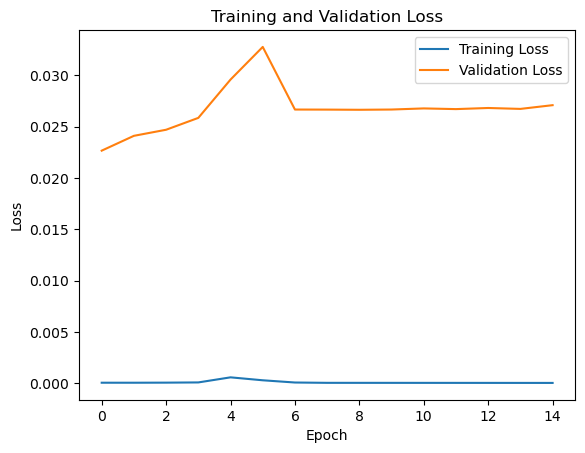

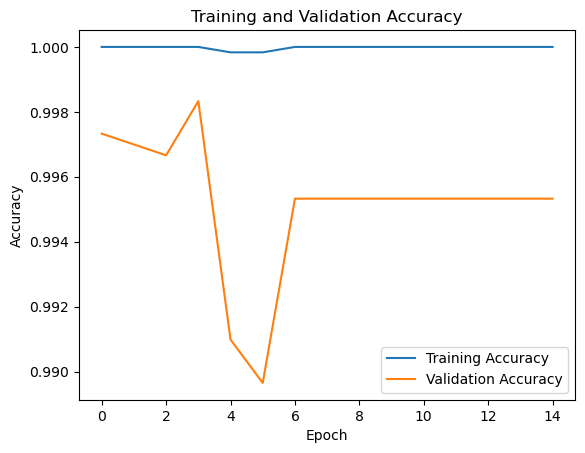

In [35]:
import matplotlib.pyplot as plt

history = nn.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [40]:
predictions = (nn.predict(X_test_scaled)).astype("int32")
results = pd.DataFrame({"predictions": predictions.ravel(), "actual":y_test})
display(results)

156/156 [==============================] - 0s 620us/step


,predictions,actual
19215,0,0
18030,0,0
3401,0,0
7285,0,0
17825,0,0
...,...,...
18602,0,0
1333,0,0
3383,0,0
17852,0,0


In [42]:
# Predict probabilities on the test data
y_probs = nn.predict(X_test)

y_pred = (y_probs > 0.5).astype(int)


156/156 [==============================] - 0s 704us/step


In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Accuracy: 1.00
Precision: 0.19
Recall: 0.38
F1-score: 0.25


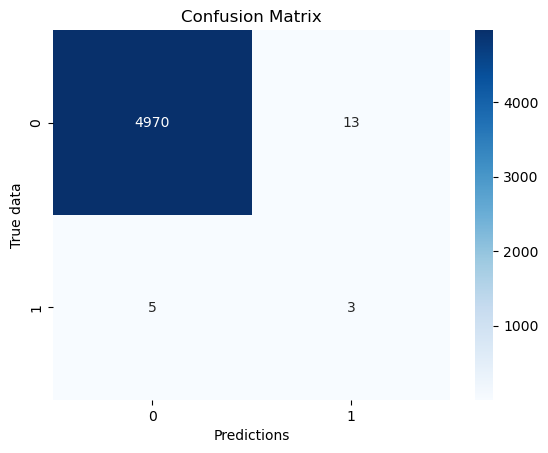

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predictions")
plt.ylabel("True data")
plt.title("Confusion Matrix")
plt.show()


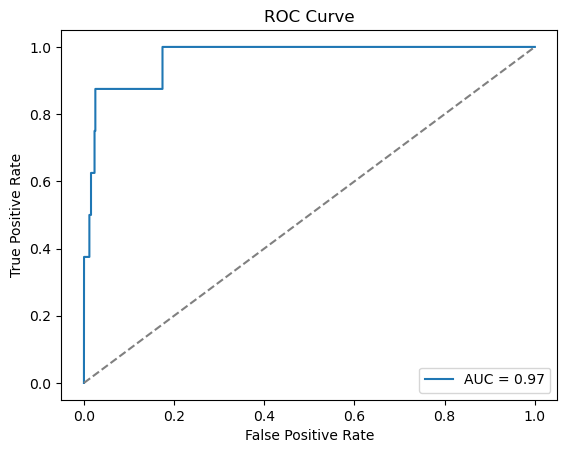

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
